In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)


100%|██████████| 21.5k/21.5k [00:00<00:00, 21.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [ ]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv')

In [ ]:
data_c= data.copy()

In [ ]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
data_c.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data_c.drop(columns='Id',inplace=True)

In [ ]:
data_c.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_c.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
data_c[data_c.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [ ]:
data_c.drop_duplicates(keep="first",inplace=True)

In [ ]:
data_c.groupby('quality').mean().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26
5,8.13,0.59,0.24,2.53,0.09,16.77,56.00,1.0,3.30,0.61,9.91
6,8.33,0.50,0.27,2.44,0.09,15.22,40.10,1.0,3.32,0.67,10.67
7,8.78,0.39,0.38,2.75,0.07,14.21,37.46,1.0,3.29,0.74,11.54
8,8.68,0.41,0.43,2.65,0.07,11.47,30.27,1.0,3.25,0.77,12.00


In [ ]:
data_c.shape

(1018, 12)

In [ ]:
data_c.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
correlation=data_c.corr()

<Axes: >

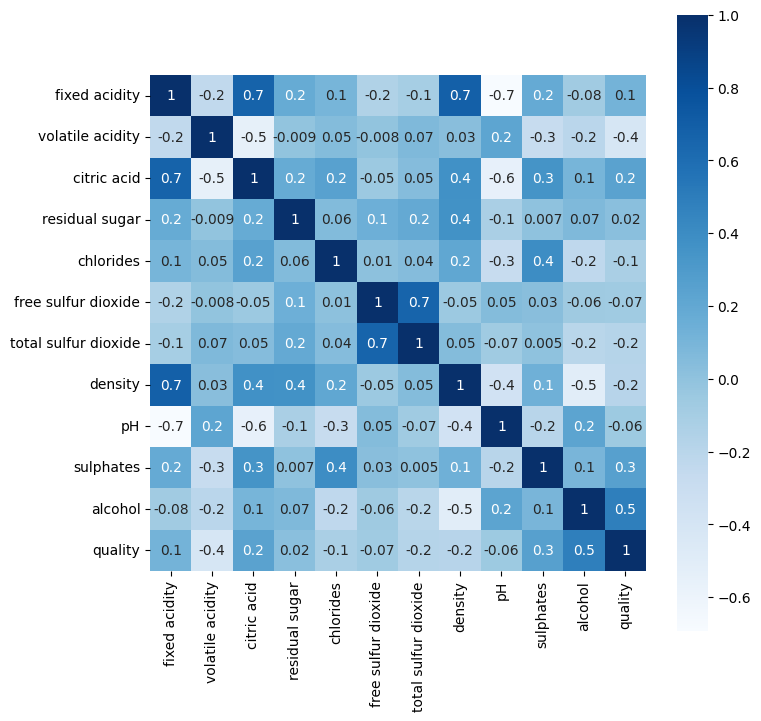

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True,cmap='Blues',fmt='.1g',annot=True)

<Axes: ylabel='fixed acidity'>

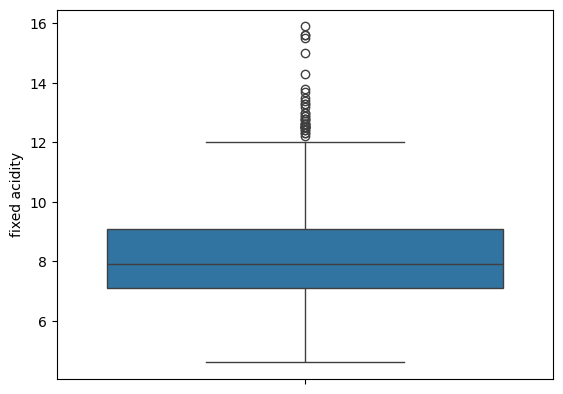

In [ ]:
sns.boxplot(data=data_c, y='fixed acidity')


<Axes: ylabel='volatile acidity'>

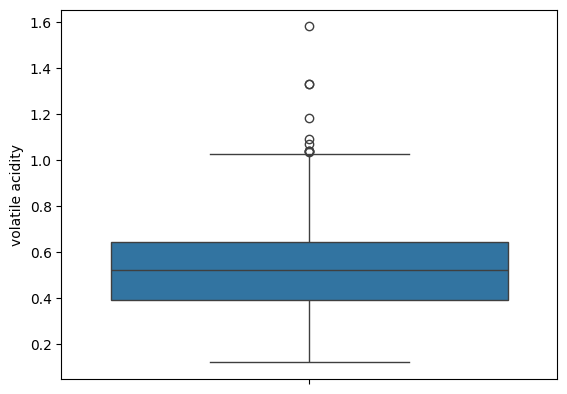

In [ ]:
sns.boxplot(data=data_c, y='volatile acidity')


<Axes: ylabel='citric acid'>

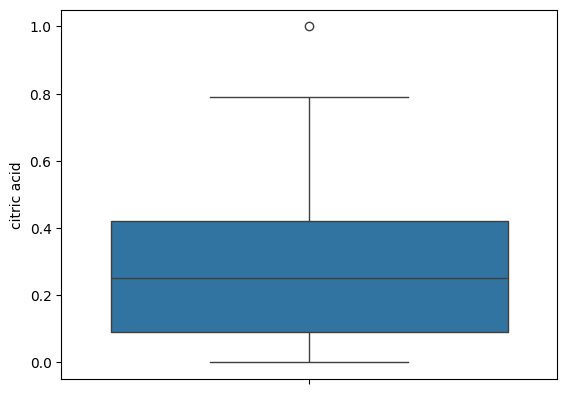

In [ ]:
sns.boxplot(data=data_c, y='citric acid')


<Axes: ylabel='residual sugar'>

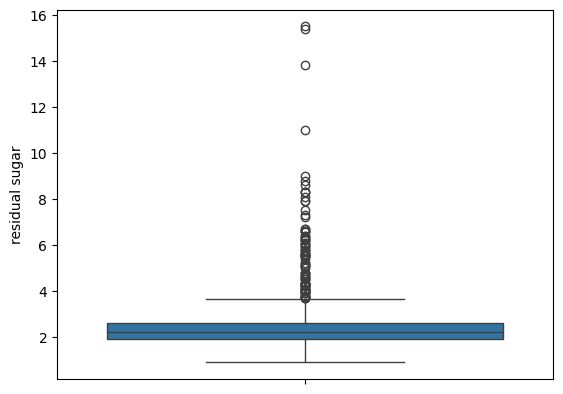

In [ ]:
sns.boxplot(data=data_c, y='residual sugar')


<Axes: ylabel='chlorides'>

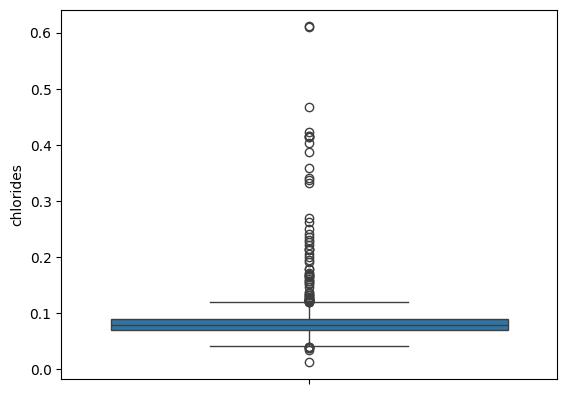

In [ ]:
sns.boxplot(data=data_c, y='chlorides')


<Axes: ylabel='free sulfur dioxide'>

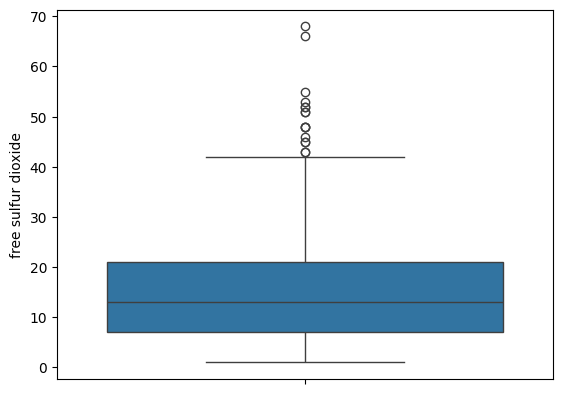

In [ ]:
sns.boxplot(data=data_c, y='free sulfur dioxide')


<Axes: ylabel='total sulfur dioxide'>

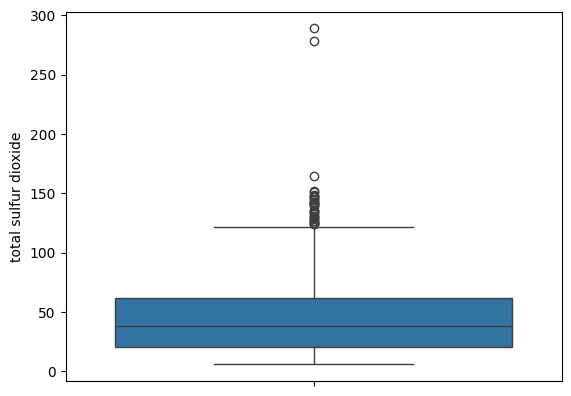

In [ ]:
sns.boxplot(data=data_c, y='total sulfur dioxide')


<Axes: ylabel='density'>

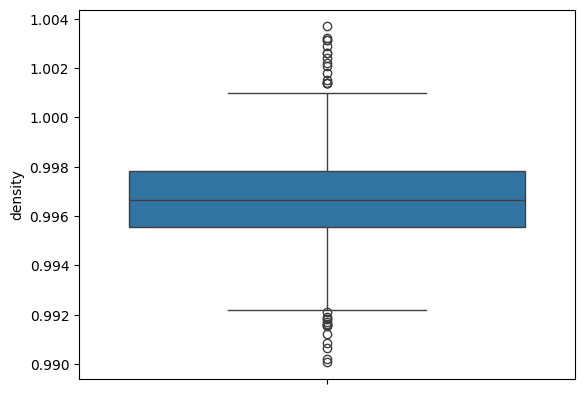

In [ ]:
sns.boxplot(data=data_c, y='density')


<Axes: ylabel='pH'>

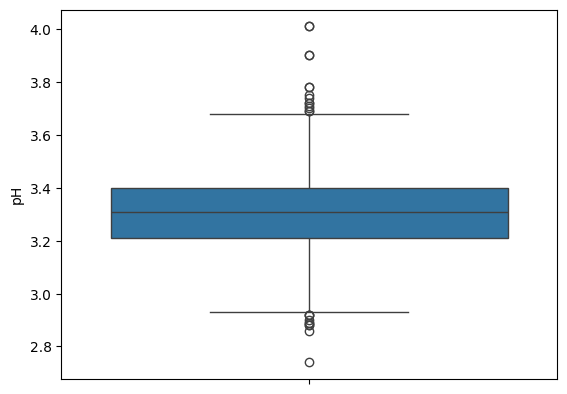

In [ ]:
sns.boxplot(data=data_c, y='pH')


<Axes: ylabel='alcohol'>

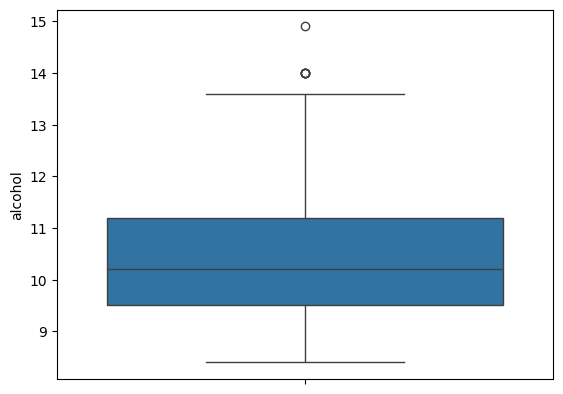

In [ ]:
sns.boxplot(data=data_c, y='alcohol')


In [ ]:
data_c.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

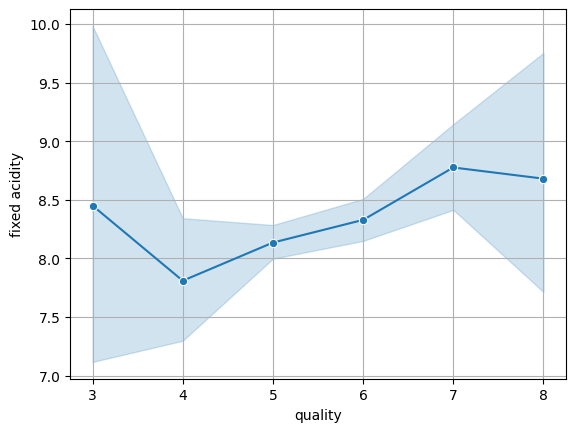

In [ ]:
sns.lineplot(data=data_c,x='quality',y='fixed acidity',marker='o')
plt.grid()

**Insight**: Wines with varying acidity levels might not strongly influence quality, suggesting that other factors may play a more significant role in determining wine quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

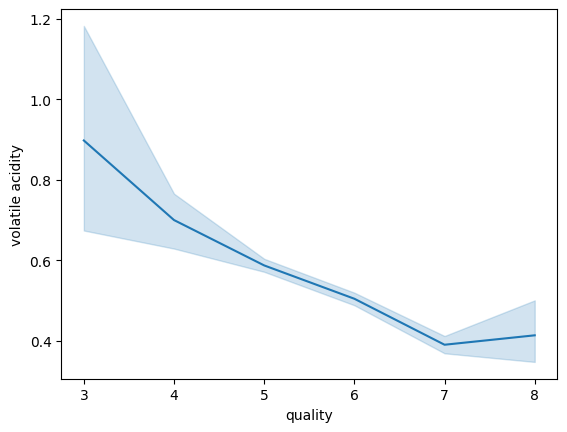

In [ ]:
sns.lineplot(data=data_c,x='quality',y='volatile acidity')

**Insight**:
- In small amounts, Volatile Acid can enhance wine by adding aromatic interest.
- High levels can indicate spoilage or poor production practices, leading to rejection by consumers or regulatory authorities.

Therefore,from the above visualization we can say that for a good quality wine volatile acidity should be low.

<Axes: xlabel='quality', ylabel='citric acid'>

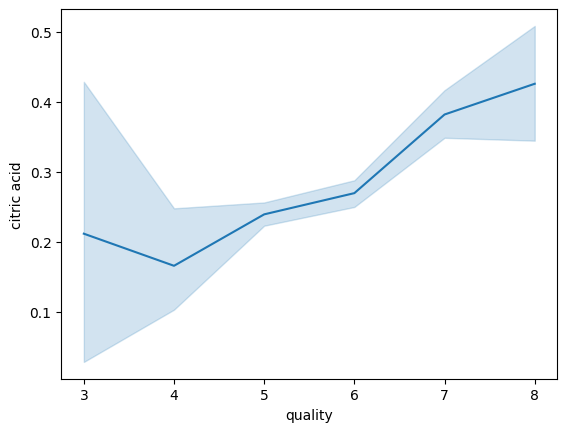

In [ ]:
sns.lineplot(data=data_c,x='quality',y='citric acid')

**Insight**:
- Citric acid, contributing to the wine's freshness and flavor balance, might positively correlate with wine quality.
- The plot shows the average citric acid content across different wine quality levels. A slight upward trend may indicate that higher-quality wines tend to have slightly higher citric acid content.

<Axes: xlabel='quality', ylabel='residual sugar'>

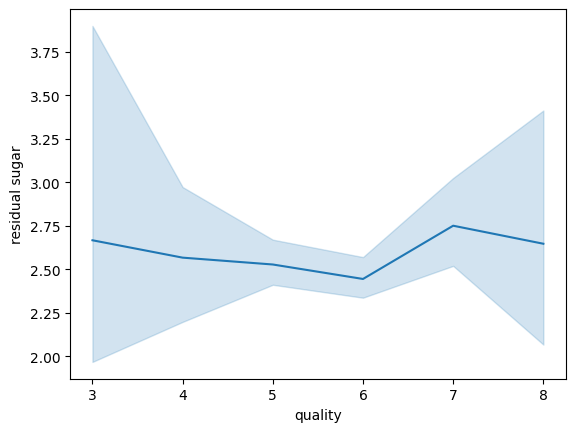

In [ ]:
sns.lineplot(data=data_c,x='quality',y='residual sugar')

**insight**:The correlation between residual sugar and quality is approximately 0.022, indicating a very weak (almost negligible) linear relationship.

<Axes: xlabel='quality', ylabel='chlorides'>

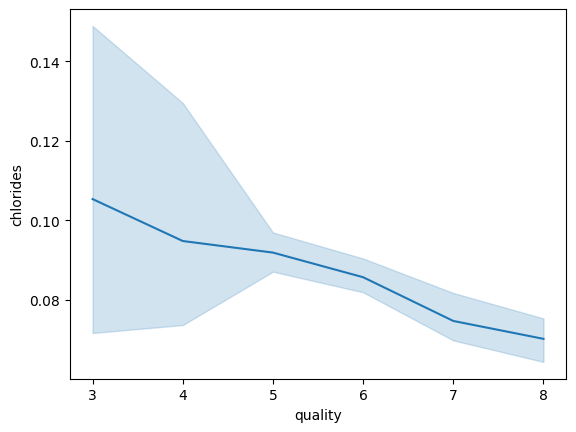

In [ ]:
sns.lineplot(data=data_c,x='quality',y='chlorides')

**Insight**:The correlation between chlorides and quality is -0.1, indicating a weak negative linear relationship.
- There is a noticeable decreasing trend, where higher-quality wines generally have lower average chloride levels.
- This aligns with the weak negative correlation observed earlier, suggesting that higher chloride concentrations could be slightly indicative of lower-quality wines.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

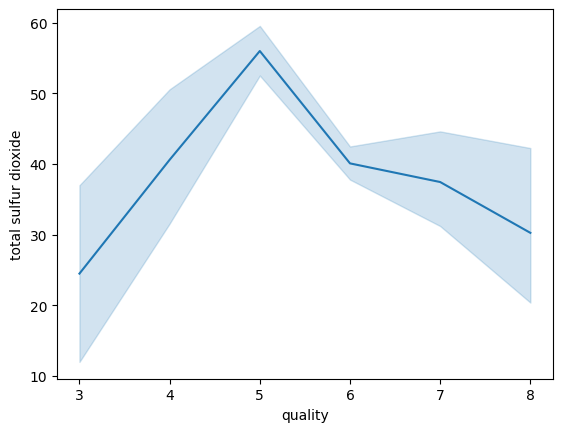

In [ ]:
sns.lineplot(data=data_c,x='quality',y='total sulfur dioxide')

<Axes: xlabel='quality', ylabel='sulphates'>

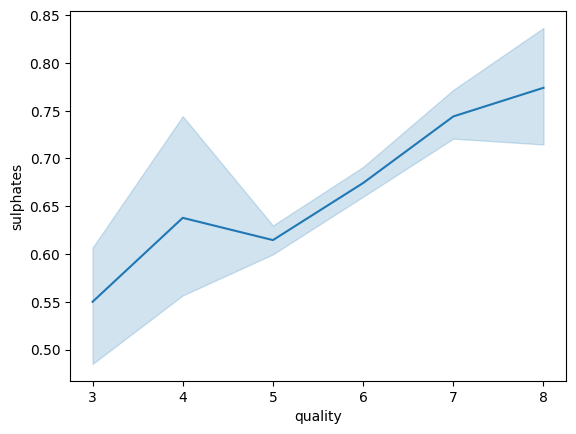

In [ ]:
sns.lineplot(data=data_c,x='quality',y='sulphates')

**Insight**:Moderate positive correlation of 0.3 is suggesting that higher sulphate levels are linked to better quality.

<Axes: xlabel='quality', ylabel='alcohol'>

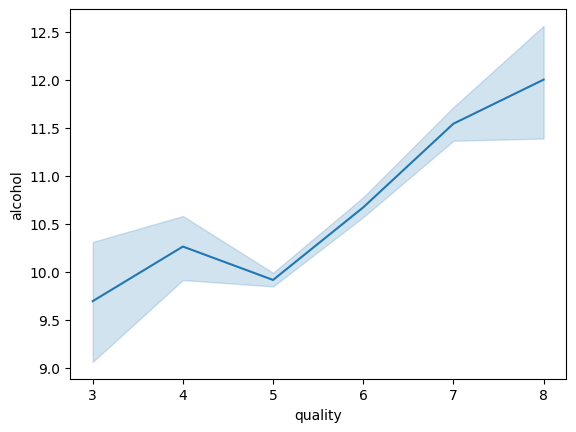

In [ ]:

sns.lineplot(data=data_c,x='quality',y='alcohol')

**insight**: positive correlation of 0.5 indicating that higher alcohol content is strongly associated with higher quality wines.


<Axes: xlabel='quality', ylabel='pH'>

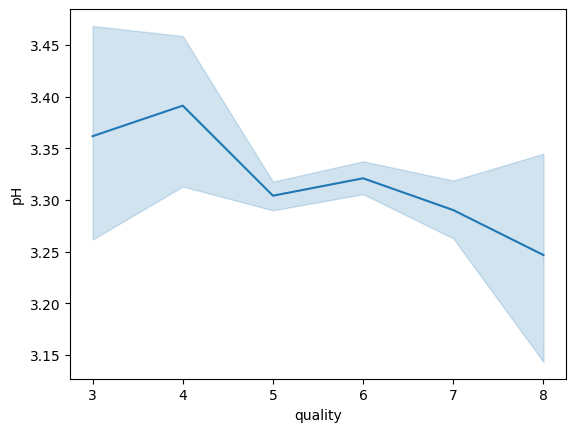

In [ ]:
sns.lineplot(data=data_c,x='quality',y='pH')

**Insights**:
- The correlation between pH and quality is approximately -0.052, indicating a very weak negative relationship.
- This suggests that pH has minimal impact on determining wine quality.

In [ ]:
data_c.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
fv = data_c.iloc[:,:-1]
cv = data_c.iloc[:,-1]

In [ ]:
cv

,quality
0,5
1,5
2,5
3,6
5,5
...,...
1138,6
1139,6
1140,5
1141,6


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:

knn=KNeighborsClassifier(n_neighbors=1) # created an algorthim

cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy")["test_score"].mean()

0.4803469358222994

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):


  k=trial.suggest_int("n_neighbors",20,50)

  weight=trial.suggest_categorical("weights",["uniform","distance"])

  p1=trial.suggest_categorical("distance",[1,2])

  alg=trial.suggest_categorical("algo",["ball_tree","kd_tree","brute"])


  knn=KNeighborsClassifier(n_neighbors=k,p=p1,weights=weight,algorithm=alg) # created an algorthim

  test_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy")["test_score"].mean()

  return test_acc

In [ ]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler()) # you are going to create a study object

In [ ]:
study.optimize(objective,n_trials=100)

In [ ]:
study.best_params

In [ ]:
study.best_value

In [ ]:
# grid search

In [ ]:
x_train.shape

In [ ]:
914//3

In [ ]:
np.sqrt(608)  # this is a thumb rule that the values of k near to 1 and n will have over fitting and under fitting issues so this is the reasn square root the x_train data poinst and use k values near to tha square root value.
              # i.e just less than 24 and greater than 24 ---> we have used in between 14 to 100

24.657656011875904

In [ ]:
def objective(trial):


  k=trial.suggest_int("k",14,100)

  weight=trial.suggest_categorical("weight",["uniform","distance"])

  p1=trial.suggest_categorical("p1",[1,2])

  alg=trial.suggest_categorical("alg",["ball_tree","kd_tree","brute"])


  knn=KNeighborsClassifier(n_neighbors=k,p=p1,algorithm=alg,weights=weight) # created an algorthim

  test_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["test_score"].mean()
  train_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["train_score"].mean()

  trial.set_user_attr("trainning accuracy",train_acc)  # since objective gives only one return we used this to add one column to the df to know training accracy



  return test_acc

In [ ]:
from optuna.samplers import GridSampler

In [ ]:
search_space={"k":range(14,101),'p1':[1,2],"weight":["uniform","distance"],"alg":["ball_tree","kd_tree","brute"]}
study= optuna.create_study(direction='maximize',sampler=optuna.samplers.GridSampler(search_space))

[I 2025-02-03 09:58:09,120] A new study created in memory with name: no-name-430d63a5-7abf-46b1-8d15-5685a6a7d6fe


In [ ]:
study.optimize(objective)

[I 2025-02-03 09:58:12,139] Trial 0 finished with value: 0.5589953693654583 and parameters: {'k': 75, 'weight': 'distance', 'p1': 2, 'alg': 'ball_tree'}. Best is trial 0 with value: 0.5589953693654583.
[I 2025-02-03 09:58:12,439] Trial 1 finished with value: 0.5639108964619058 and parameters: {'k': 93, 'weight': 'uniform', 'p1': 2, 'alg': 'brute'}. Best is trial 1 with value: 0.5639108964619058.
[I 2025-02-03 09:58:12,556] Trial 2 finished with value: 0.5577382244410679 and parameters: {'k': 31, 'weight': 'uniform', 'p1': 2, 'alg': 'brute'}. Best is trial 1 with value: 0.5639108964619058.
[I 2025-02-03 09:58:12,743] Trial 3 finished with value: 0.5725028941465885 and parameters: {'k': 63, 'weight': 'uniform', 'p1': 1, 'alg': 'brute'}. Best is trial 3 with value: 0.5725028941465885.
[I 2025-02-03 09:58:12,931] Trial 4 finished with value: 0.5835956153679184 and parameters: {'k': 38, 'weight': 'distance', 'p1': 1, 'alg': 'ball_tree'}. Best is trial 4 with value: 0.5835956153679184.
[I 20

In [ ]:
study.best_params

{'k': 28, 'weight': 'distance', 'p1': 1, 'alg': 'brute'}

In [ ]:
study.best_value

0.5946476376528471

In [ ]:
study.best_trial

FrozenTrial(number=83, state=1, values=[0.5946476376528471], datetime_start=datetime.datetime(2025, 2, 3, 9, 58, 41, 334316), datetime_complete=datetime.datetime(2025, 2, 3, 9, 58, 41, 518393), params={'k': 28, 'weight': 'distance', 'p1': 1, 'alg': 'brute'}, user_attrs={'trainning accuracy': 1.0}, system_attrs={'search_space': {'alg': ['ball_tree', 'kd_tree', 'brute'], 'k': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'p1': [1, 2], 'weight': ['uniform', 'distance']}, 'grid_id': 83}, intermediate_values={}, distributions={'k': IntDistribution(high=100, log=False, low=14, step=1), 'weight': CategoricalDistribution(choices=('uniform', 'distance')), 'p1': CategoricalDistribution(choices=(1

In [ ]:
df=study.trials_dataframe()
df.head()

,number,value,datetime_start,datetime_complete,duration,params_alg,params_k,params_p1,params_weight,user_attrs_trainning accuracy,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.558995,2025-02-03 09:58:11.871331,2025-02-03 09:58:12.138408,0 days 00:00:00.267077,ball_tree,75,2,distance,1.000000,0,"{'alg': ['ball_tree', 'kd_tree', 'brute'], 'k'...",COMPLETE
1,1,0.563911,2025-02-03 09:58:12.142498,2025-02-03 09:58:12.439171,0 days 00:00:00.296673,brute,93,2,uniform,0.572496,1,"{'alg': ['ball_tree', 'kd_tree', 'brute'], 'k'...",COMPLETE
2,2,0.557738,2025-02-03 09:58:12.442945,2025-02-03 09:58:12.556412,0 days 00:00:00.113467,brute,31,2,uniform,0.605054,2,"{'alg': ['ball_tree', 'kd_tree', 'brute'], 'k'...",COMPLETE
3,3,0.572503,2025-02-03 09:58:12.558758,2025-02-03 09:58:12.742757,0 days 00:00:00.183999,brute,63,1,uniform,0.593379,3,"{'alg': ['ball_tree', 'kd_tree', 'brute'], 'k'...",COMPLETE
4,4,0.583596,2025-02-03 09:58:12.745559,2025-02-03 09:58:12.931184,0 days 00:00:00.185625,ball_tree,38,1,distance,1.000000,4,"{'alg': ['ball_tree', 'kd_tree', 'brute'], 'k'...",COMPLETE


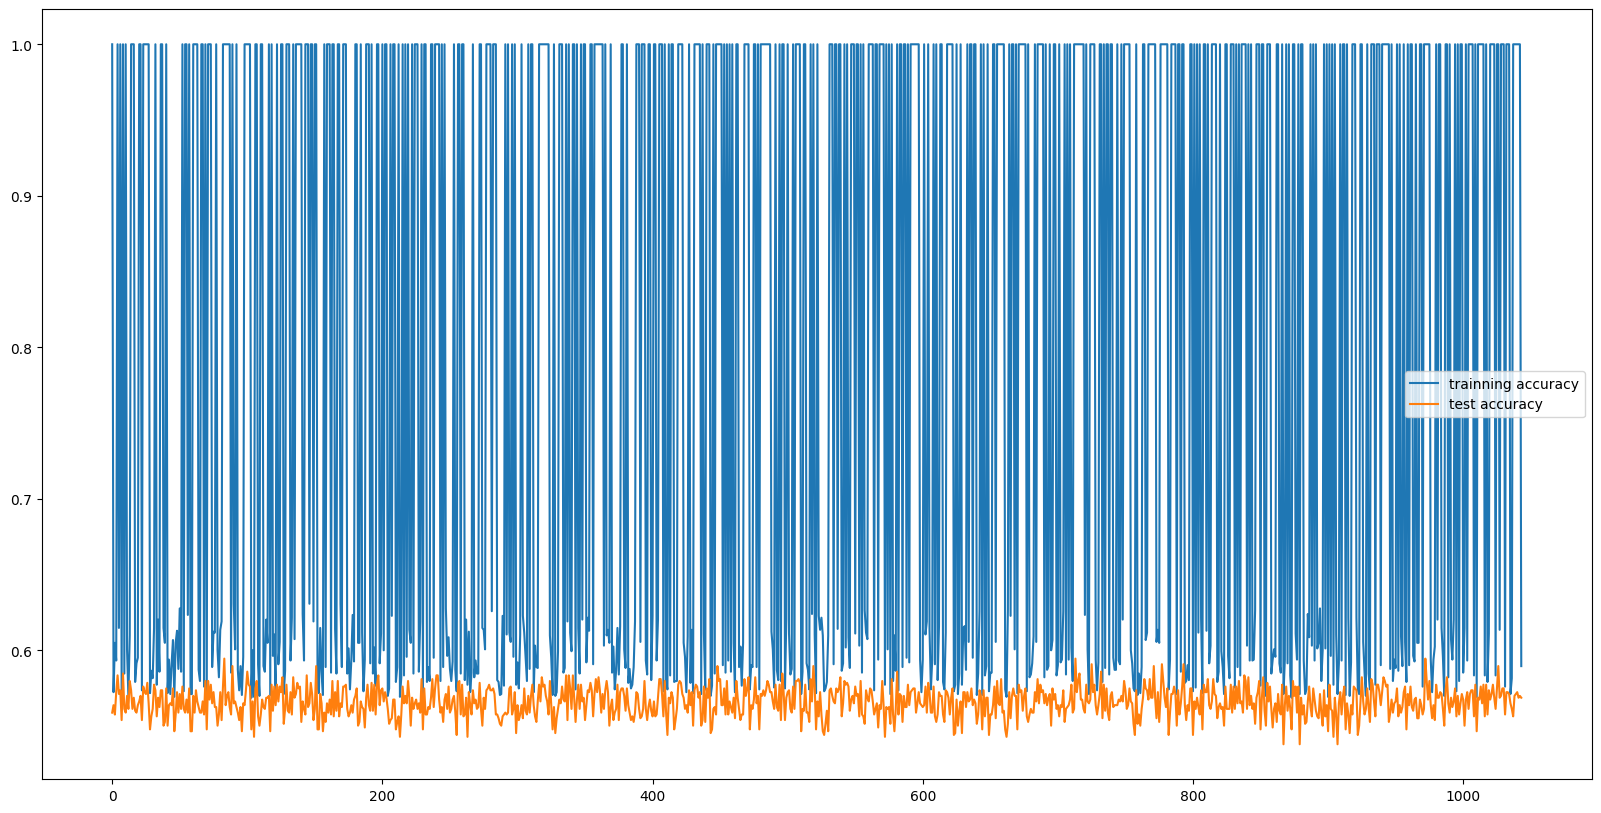

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df["number"],df["user_attrs_trainning accuracy"],label="trainning accuracy")
plt.plot(df["number"],df["value"],label="test accuracy")
plt.xticks()
plt.legend()
plt.show()

In [ ]:
from optuna.visualization import plot_param_importances, plot_optimization_history

In [ ]:
plot_param_importances(study)

In [ ]:
plot_optimization_history(study)

In [ ]:
# random search

In [ ]:
def objective(trial):


  k=trial.suggest_int("k",14,100)

  weight=trial.suggest_categorical("weight",["uniform","distance"])

  p1=trial.suggest_categorical("p1",[1,2])

  alg=trial.suggest_categorical("alg",["ball_tree","kd_tree","brute"])


  knn=KNeighborsClassifier(n_neighbors=k,p=p1,algorithm=alg,weights=weight) # created an algorthim

  test_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["test_score"].mean()
  train_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["train_score"].mean()

  trial.set_user_attr("trainning accuracy",train_acc)  # since objective gives only one return we used this to add one column to the df to know training accracy



  return test_acc

In [ ]:
#search_space={"k":range(1,6),"p1":[1,2],"weight":["uniform","distance"],"alg":["ball_tree","kd_tree","brute"]}

study=optuna.create_study(direction="maximize",sampler=optuna.samplers.RandomSampler())


[I 2025-02-03 10:22:51,514] A new study created in memory with name: no-name-75e791b0-e8f7-4433-9097-2dcff855adcb


In [ ]:
study.optimize(objective,n_trials=30)

[I 2025-02-03 10:22:54,966] Trial 0 finished with value: 0.5897230663483105 and parameters: {'k': 33, 'weight': 'distance', 'p1': 1, 'alg': 'kd_tree'}. Best is trial 0 with value: 0.5897230663483105.
[I 2025-02-03 10:22:55,456] Trial 1 finished with value: 0.5503943274726865 and parameters: {'k': 79, 'weight': 'uniform', 'p1': 2, 'alg': 'kd_tree'}. Best is trial 0 with value: 0.5897230663483105.
[I 2025-02-03 10:22:55,948] Trial 2 finished with value: 0.557778923377469 and parameters: {'k': 83, 'weight': 'uniform', 'p1': 1, 'alg': 'ball_tree'}. Best is trial 0 with value: 0.5897230663483105.
[I 2025-02-03 10:22:56,208] Trial 3 finished with value: 0.5688264235583532 and parameters: {'k': 97, 'weight': 'distance', 'p1': 2, 'alg': 'brute'}. Best is trial 0 with value: 0.5897230663483105.
[I 2025-02-03 10:22:56,687] Trial 4 finished with value: 0.556571521597569 and parameters: {'k': 91, 'weight': 'uniform', 'p1': 1, 'alg': 'ball_tree'}. Best is trial 0 with value: 0.5897230663483105.
[I 

In [ ]:
plot_optimization_history(study)

In [ ]:
# bayesian search

In [ ]:
def objective(trial):


  k=trial.suggest_int("k",1,5)

  weight=trial.suggest_categorical("weight",["uniform","distance"])

  p1=trial.suggest_categorical("p1",[1,2])

  alg=trial.suggest_categorical("alg",["ball_tree","kd_tree","brute"])


  knn=KNeighborsClassifier(n_neighbors=k,p=p1,algorithm=alg,weights=weight) # created an algorthim

  test_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["test_score"].mean()
  train_acc=cross_validate(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy",return_train_score=True)["train_score"].mean()

  trial.set_user_attr("trainning accuracy",train_acc)  # since objective gives only one return we used this to add one column to the df to know training accracy



  return test_acc

In [ ]:

study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-02-03 10:23:38,128] A new study created in memory with name: no-name-b4add057-fbf8-408b-8188-d8c0510876b5


In [ ]:
study.optimize(objective,n_trials=30)

[I 2025-02-03 10:23:38,866] Trial 0 finished with value: 0.4803469358222994 and parameters: {'k': 2, 'weight': 'distance', 'p1': 2, 'alg': 'brute'}. Best is trial 0 with value: 0.4803469358222994.
[I 2025-02-03 10:23:39,554] Trial 1 finished with value: 0.5393468272918023 and parameters: {'k': 4, 'weight': 'uniform', 'p1': 1, 'alg': 'kd_tree'}. Best is trial 1 with value: 0.5393468272918023.
[I 2025-02-03 10:23:39,966] Trial 2 finished with value: 0.48159503653860075 and parameters: {'k': 1, 'weight': 'uniform', 'p1': 1, 'alg': 'kd_tree'}. Best is trial 1 with value: 0.5393468272918023.
[I 2025-02-03 10:23:40,299] Trial 3 finished with value: 0.4803469358222994 and parameters: {'k': 1, 'weight': 'uniform', 'p1': 2, 'alg': 'kd_tree'}. Best is trial 1 with value: 0.5393468272918023.
[I 2025-02-03 10:23:40,633] Trial 4 finished with value: 0.5049155270964475 and parameters: {'k': 2, 'weight': 'uniform', 'p1': 2, 'alg': 'kd_tree'}. Best is trial 1 with value: 0.5393468272918023.
[I 2025-02

In [ ]:
plot_optimization_history(study)

In [ ]:
knn= KNeighborsClassifier(n_neighbors= 28, weights= 'distance', metric= 'manhattan',algorithm='brute')
model = knn.fit(x_train,y_train)


In [ ]:
y_cap=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,log_loss,classification_report,roc_curve,roc_auc_score


In [ ]:
accuracy_score(y_test,y_cap)

0.5686274509803921

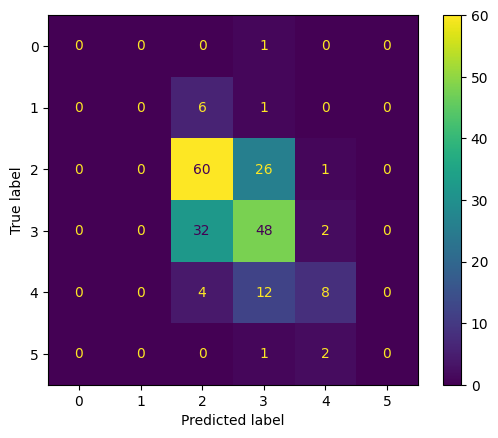

In [ ]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_cap))
cm.plot()
plt.show()

In [ ]:
confusion_matrix(y_test,y_cap)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  1,  0,  0],
       [ 0,  0, 60, 26,  1,  0],
       [ 0,  0, 32, 48,  2,  0],
       [ 0,  0,  4, 12,  8,  0],
       [ 0,  0,  0,  1,  2,  0]])

In [ ]:
print(classification_report(y_test,y_cap))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.59      0.69      0.63        87
           6       0.54      0.59      0.56        82
           7       0.62      0.33      0.43        24
           8       0.00      0.00      0.00         3

    accuracy                           0.57       204
   macro avg       0.29      0.27      0.27       204
weighted avg       0.54      0.57      0.55       204



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

